In [1]:
import numpy as np
import pandas as pd

In [2]:
#Load the data
df = pd.read_csv('marketing_campaign.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0


## Data Preparation

In [3]:
#Remove Unwanted Columns
df = df.iloc[:, 2:]
df = df.drop(columns = ['Dt_Customer', 'Recency'])
df['age'] = 2020 - df.Year_Birth
df = df.drop(columns = 'Year_Birth')

In [4]:
#Changing data to numerical

df = pd.get_dummies(data=df,
                   drop_first = True)

df.iloc[:, 10:] = df.iloc[:, 10:].astype(int) 

df.head()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,635,88,546,172,88,88,3,...,1,0,0,0,0,0,1,0,0,0
1,46344.0,1,1,11,1,6,2,1,6,2,...,1,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,426,49,127,111,21,42,1,...,1,0,0,0,0,0,0,1,0,0
3,26646.0,1,0,11,4,20,10,3,5,2,...,1,0,0,0,0,0,0,1,0,0
4,58293.0,1,0,173,43,118,46,27,15,5,...,0,0,1,0,0,1,0,0,0,0


In [5]:
#Summary Statistics
df.describe()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,...,0.503125,0.165179,0.216964,0.001339,0.103571,0.385714,0.214286,0.258929,0.034375,0.000893
std,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,...,0.500102,0.371425,0.412270,0.036580,0.304772,0.486872,0.410418,0.438144,0.182231,0.029874
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#removing na values
df = df.dropna()

In [7]:
#isolate x and y
y = df.Income
X = df.drop(columns='Income')

In [8]:
#Training and Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state = 1502)

## Random Forest 

In [9]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 300,
                             random_state = 1502)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=1502)

## Model Assessment

In [10]:
#Predictions
predictions = model.predict(X_test)
print(predictions)

[ 66488.74        19450.09666667  64682.58        49538.68666667
  47827.66666667  37853.62        43500.07666667  25760.16666667
  94071.36333333  19060.06333333  69959.88666667  27037.87666667
  50336.77        52717.05        72345.6         33978.59666667
  58522.29        39425.36666667  43510.06        24705.29333333
  36243.23        15039.16666667  37352.47666667  55043.56333333
  29793.70666667  30674.98333333  42362.85333333  69610.07
  72269.31666667  88657.16        63001.34333333  37879.1
  34456.87333333  19470.73666667  34261.79        39372.87333333
  54732.65        54745.32        71816.49        20961.21333333
  43779.10666667  25744.97        21237.32        19616.23666667
  41360.11        70941.23333333  67096.92333333  55001.63666667
  46003.36666667  71286.82333333  80980.71666667  77540.93
  62400.10666667  68390.56666667  55303.82666667  73687.39
  74347.50333333  81226.86333333  42258.45666667  44801.08666667
  49360.38666667  19726.06333333  83215.94333333  

In [11]:
#Model Assessment
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, predictions))
print(y_test.mean())
print(y_test.std())

6543.338626126127
50734.41891891892
22073.552789063204


## Feature Importance

<Axes: >

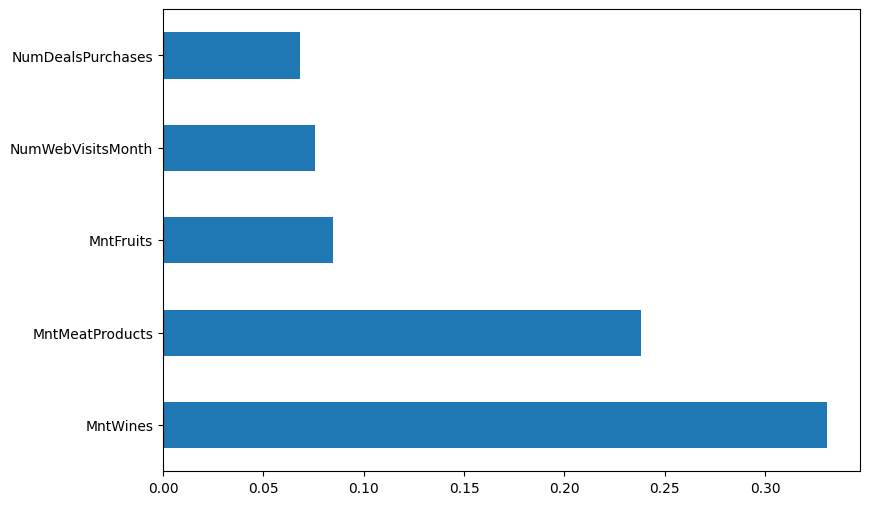

In [12]:
#Feature Importance

importance = pd.Series(model.feature_importances_,
                      index = X_train.columns.values)
importance.nlargest(5).plot(kind = 'barh',
                           figsize = (9,6))

## Parameter Tuning

In [13]:
#Parameter Grid
from sklearn.model_selection import ParameterGrid

param_grid = {'n_estimators': range(50,501, 50)}
grid = ParameterGrid(param_grid)

In [14]:
#Parameters Tuning

#List to store MEA

mea = []

#loop
for i in grid:
    
    #Build the model
    model = RandomForestRegressor(n_estimators = i['n_estimators'],
                                 random_state = 1502)
    model.fit(X_train, y_train)
    
    #Predictions
    predictions = model.predict(X_test)
    
    #Accuracy Assessment
    error = mean_absolute_error(y_test, predictions)
    
    #Append to list
    mea.append(error)
    

In [16]:
best_params = grid[np.argmin(error)]
print(best_params)

{'n_estimators': 50}


## Random Forest Remodeled

In [17]:
model = RandomForestRegressor(n_estimators = 50,
                             random_state = 1502)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=1502)

In [18]:
print(mean_absolute_error(y_test, predictions))
print(y_test.mean())
print(y_test.std())

6544.882977477479
50734.41891891892
22073.552789063204
